path=WindowsPath('c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2')


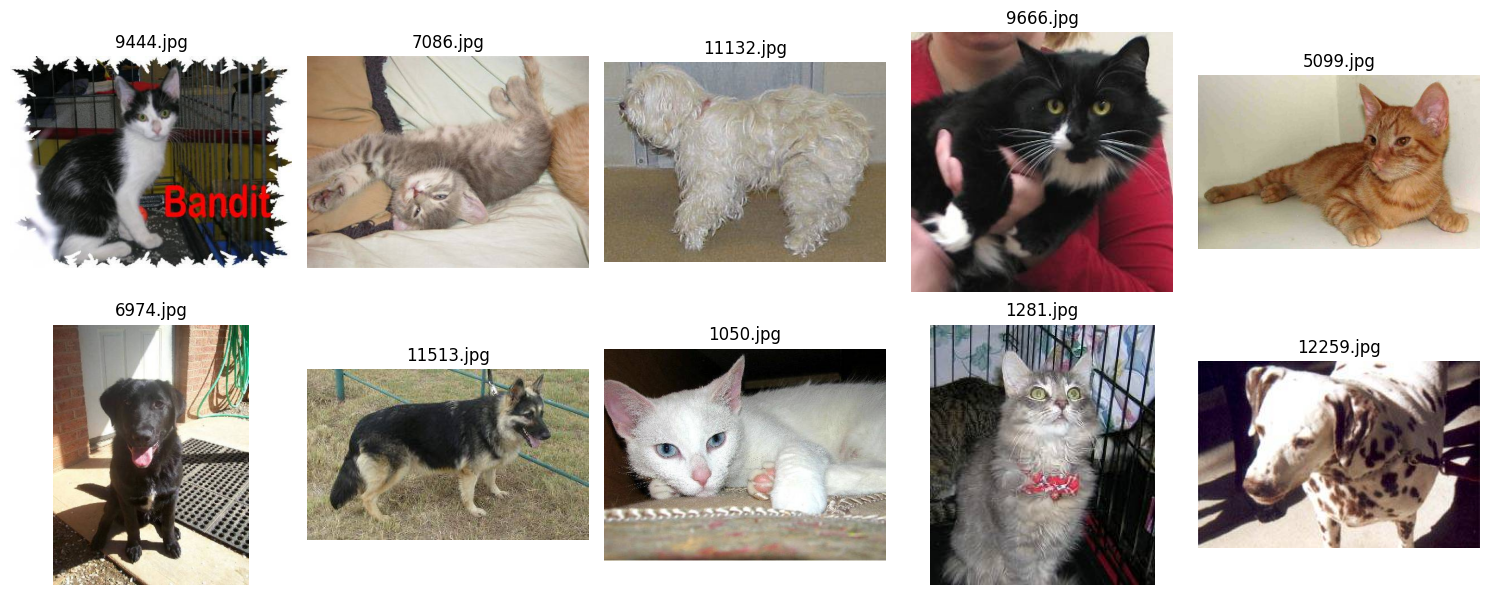

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

# Set the path to the directory containing the image files
path = Path().absolute()
print(f"{path=}")

# Correctly set up the absolute path as a Path object
absolute_path = Path(r"c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2/original_data/test/test")

# List all .jpg image files in the directory
image_files = list(absolute_path.glob('*.jpg'))

# Check if there are enough files to sample from
if len(image_files) < 10:
    raise ValueError("Not enough image files to sample 10 items.")

# randomly select 10 image files
random_files = random.sample(image_files, 10)

# figure to display the images in a grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust subplot grid as needed
axes = axes.flatten()

# Read and display each image file
for ax, file_path in zip(axes, random_files):
    # Read the image using OpenCV
    image = cv2.imread(str(file_path), cv2.IMREAD_UNCHANGED)
    # Convert BGR to RGB (OpenCV loads images in BGR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    ax.imshow(image_rgb)
    ax.axis('off')  # Hide axes
    ax.set_title(file_path.name)  #set the file name as title

plt.tight_layout()
plt.show()


In [8]:
# import shutil
# from pathlib import Path
# import random

# def create_directory_structure(base_dir):
#     # Define the base directory as a Path object
#     base_path = Path(base_dir)
    
#     # List of directories to create
#     directories = [
#         'experiment_small_data/test',
#         'experiment_small_data/train',
#         'experiment_small_data/val',
#         'experiment_tiny_data/test',
#         'experiment_tiny_data/train',
#         'experiment_tiny_data/val'
#     ]
    
#     # Loop through the directories list and create each one
#     for directory in directories:
#         (base_path / directory).mkdir(parents=True, exist_ok=True)
    
#     print("Directory structure created successfully!")

# def distribute_files(base_dir, source_dir, experiments):
#     patterns = {
#         'dogs': 'dog.*.jpg',
#         'cats': 'cat.*.jpg'
#     }
    
#     # Initialize dictionaries to store images
#     images = { 'dogs': [], 'cats': [] }

#     # Populate dictionaries by filtering with patterns and ensuring 1250 files each
#     for file in source_dir.glob('*.jpg'):
#         if 'dog' in file.name and len(images['dogs']) < 1250:
#             images['dogs'].append(file)
#         elif 'cat' in file.name and len(images['cats']) < 1250:
#             images['cats'].append(file)
    
#     # Check if we have enough images
#     if len(images['dogs']) < 1250 or len(images['cats']) < 1250:
#         print(f"Not enough images: Found {len(images['dogs'])} dogs and {len(images['cats'])} cats.")
#         return
    
#     # Handle the distribution for each experiment
#     for experiment, splits in experiments.items():
#         for category, img_list in images.items():
#             random.shuffle(img_list)

#             # Calculate the number of files for each subset based on the specifications
#             num_train = splits['train']
#             num_val = splits['val']
#             num_test = splits['test']

#             # Split images into train, val, and test
#             train_images = img_list[:num_train]
#             val_images = img_list[num_train:num_train + num_val]
#             test_images = img_list[num_train + num_val:num_train + num_val + num_test]

#             # Move files to their new destinations
#             for img_list, split in zip([train_images, val_images, test_images], ['train', 'val', 'test']):
#                 target_path = base_dir / experiment / split
#                 target_path.mkdir(parents=True, exist_ok=True)  # Ensure target directory exists
#                 for image in img_list:
#                     try:
#                         shutil.move(str(image), target_path / image.name)  # Use move instead of copy to avoid duplicates
#                     except FileNotFoundError:
#                         print(f"File not found, skipping: {image}")

# # Define the base directory and the source directory
# base_dir = Path(r'C:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2')
# source_dir = base_dir / 'original_data/train/train'  # Updated path to the combined directory

# # Create the necessary directory structure
# create_directory_structure(base_dir)

# # Define the experiments and the number of images per category for each split
# experiments = {
#     'experiment_small_data': {'train': 800, 'val': 200, 'test': 250},  # Each number is per category
#     'experiment_tiny_data': {'train': 80, 'val': 20, 'test': 25}       # Each number is per category
# }

# # Distribute files according to the defined splits
# distribute_files(base_dir, source_dir, experiments)

# print("Files have been distributed according to the defined splits.")





# # DONT RUN AGAIN. FILES HAVE BEEN MOVED ALREADY.

Split data into experiment_small_data folder

Train directory: C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
Validation directory: C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\val
Test directory: C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\test
Reading images from C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
Found 1600 images in C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
Reading images from C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\val
Found 400 images in C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\val
Reading images from C:\Users\Burai\OneDrive\Documents\GitHub\Brian

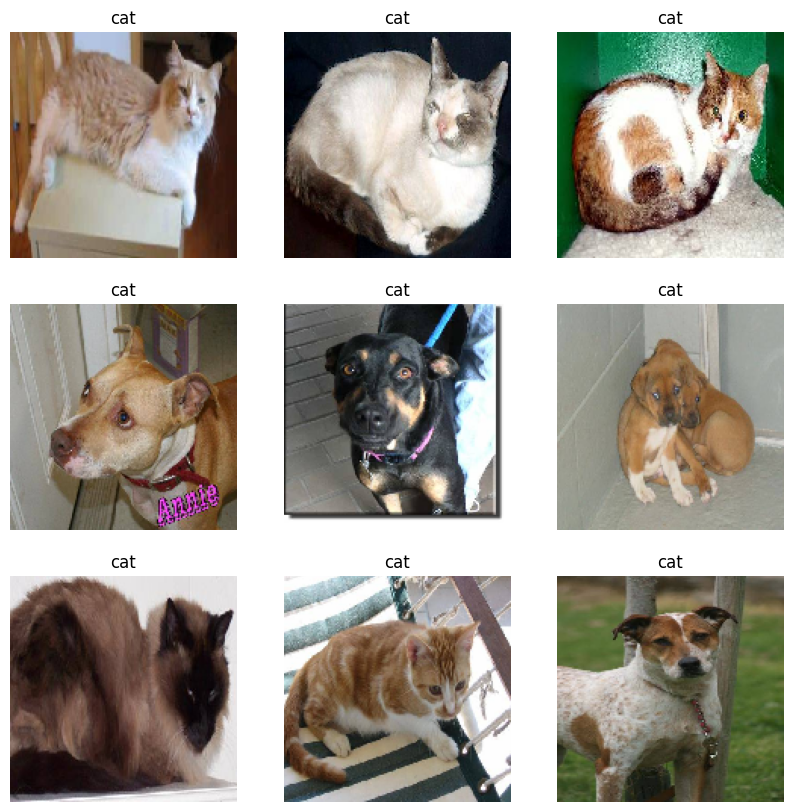

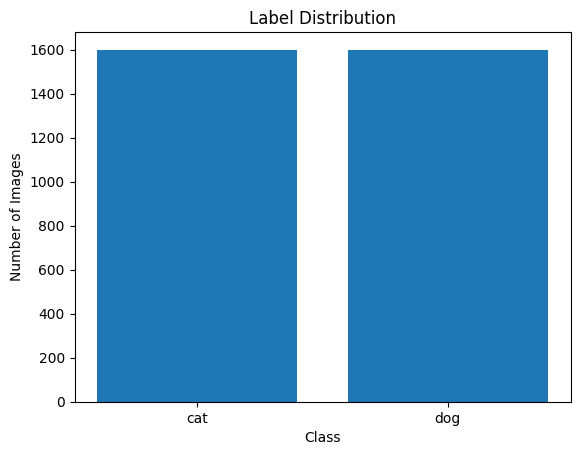

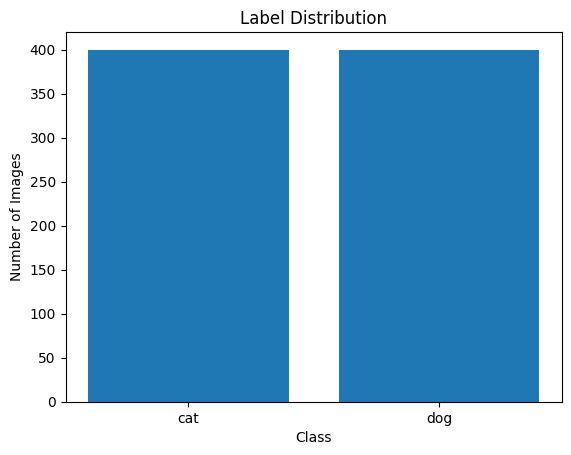

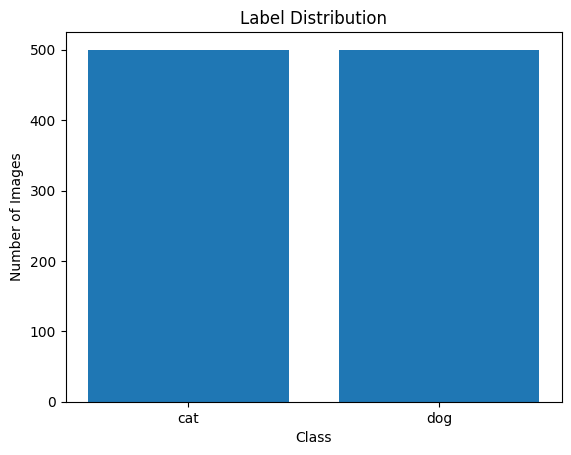

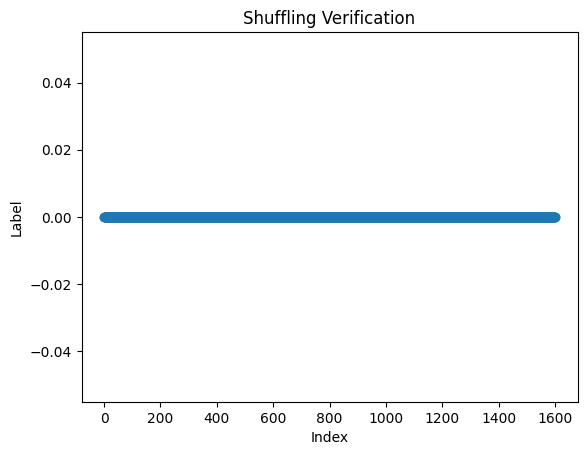

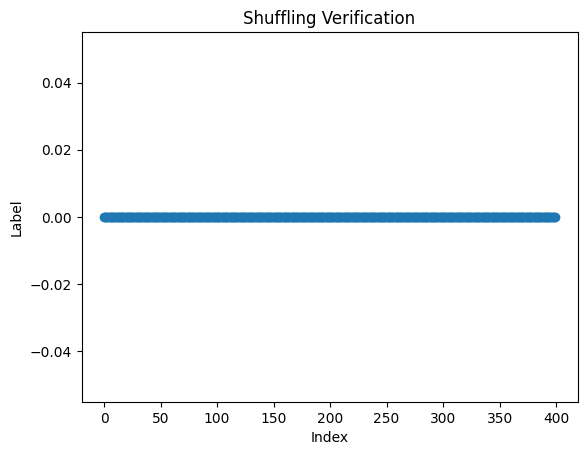

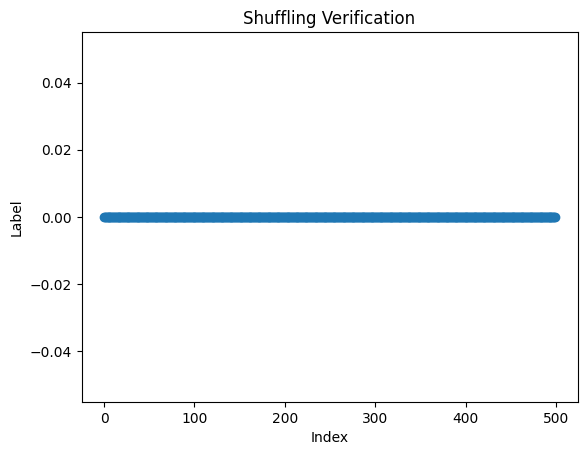

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle

def load_dataset(data_dir, target_size=(150, 150)):
    data = []
    labels = []
    data_dir = Path(data_dir)
    
    # Debug: print the directory being read #I had ChatGPT help me with debugging beacuse I was getting lazy.
    print(f"Reading images from {data_dir}")
    
    for img_path in data_dir.glob("*.jpg"):
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        data.append(img_array)
        if 'dog' in img_path.name:
            labels.append("dog")
        elif 'cat' in img_path.name:
            labels.append("cat")
    
    # Debug: print the number of images read
    print(f"Found {len(data)} images in {data_dir}")
    
    return np.array(data), np.array(labels)

def one_hot_encode(labels):
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)
    return labels

def plot_images_with_labels(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

def plot_label_distribution(labels, class_names):
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(class_names, counts)
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title("Label Distribution")
    plt.show()

def plot_shuffling(labels):
    plt.plot(labels, 'o')
    plt.xlabel("Index")
    plt.ylabel("Label")
    plt.title("Shuffling Verification")
    plt.show()

base_dir = Path('C:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2/experiment_small_data')
train_dir = base_dir / 'train'
val_dir = base_dir / 'val'
test_dir = base_dir / 'test'

# Verify directory paths
print(f"Train directory: {train_dir}")
print(f"Validation directory: {val_dir}")
print(f"Test directory: {test_dir}")

# Load datasets
train_images, train_labels = load_dataset(train_dir)
val_images, val_labels = load_dataset(val_dir)
test_images, test_labels = load_dataset(test_dir)

# Debugging prints
print(f"Loaded {len(train_images)} training images.")
print(f"Loaded {len(val_images)} validation images.")
print(f"Loaded {len(test_images)} testing images.")

# Ensure there are images loaded
if len(train_images) == 0:
    raise ValueError("The training dataset has no images.")
if len(val_images) == 0:
    raise ValueError("The validation dataset has no images.")
if len(test_images) == 0:
    raise ValueError("The testing dataset has no images.")

# One-hot encode labels
train_labels = one_hot_encode(train_labels)
val_labels = one_hot_encode(val_labels)
test_labels = one_hot_encode(test_labels)

# Shuffle data
train_images, train_labels = shuffle(train_images, train_labels)
val_images, val_labels = shuffle(val_images, val_labels)
test_images, test_labels = shuffle(test_images, test_labels)

# Class names for plotting
class_names = ["cat", "dog"]

# Plot some images with labels
plot_images_with_labels(train_images, np.argmax(train_labels, axis=1), class_names)

# Verify dataset balance
plot_label_distribution(np.argmax(train_labels, axis=1), class_names)
plot_label_distribution(np.argmax(val_labels, axis=1), class_names)
plot_label_distribution(np.argmax(test_labels, axis=1), class_names)

# Verify shuffling
plot_shuffling(np.argmax(train_labels, axis=1))
plot_shuffling(np.argmax(val_labels, axis=1))
plot_shuffling(np.argmax(test_labels, axis=1))

# i got help from CHatGPT but i did not understand the "shuffle verification" part. I will try to remake it in my own way below.


In [27]:
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_dataset(data_dir, target_size=(150, 150)):
    data = []
    labels = []
    data_dir = Path(data_dir)
    
    # Debug: print the directory being read
    print(f"Reading images from {data_dir}")
    
    for img_path in data_dir.glob("*.jpg"):
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        data.append(img_array)
        if 'dog' in img_path.name:
            labels.append("dog")
        elif 'cat' in img_path.name:
            labels.append("cat")
    
    # Debug: print the number of images read
    print(f"Found {len(data)} images in {data_dir}")
    
    return np.array(data), np.array(labels)

# Assuming datapath is correctly set to "experiment_small_data/train"
datapath = Path().absolute() / "experiment_small_data/train"
images, labels = load_dataset(datapath)

# Debug: print the number of images loaded
print(f"Loaded {len(images)} images from {datapath}")

# Ensure there are at least 2 images before accessing their shapes
if len(images) > 1:
    print(images[0].shape, images[1].shape)
else:
    print("Not enough images to display shapes.")

# Debug: Print out some image paths to verify
paths = [str(path) for path in datapath.glob("*.jpg")]
print("Image paths:")
print("\n".join(paths[:10]))  # Print first 10 image paths for verification

"dog" in paths[0]  # Check if the first image path contains "dog"

Reading images from c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
Found 1600 images in c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
Loaded 1600 images from c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
(150, 150, 3) (150, 150, 3)
Image paths:
c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train\cat.3249.jpg
c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train\cat.3251.jpg
c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train\cat.3252.jpg
c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train\cat.3254.jpg
c:\Users\Burai\OneDrive\Documents\Git

False

In [26]:
import numpy as np 
y = np.array([int("dog" in path) for path in paths])
y



False

In [29]:
import os
import numpy as np
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

# Define the data path
datapath = Path().absolute() / "experiment_small_data/train"

# Get a list of all .jpg files
file_paths = list(datapath.glob("*.jpg"))

# Shuffle the list of file paths
random.shuffle(file_paths)

# Use list comprehension to read in the images as numpy arrays
images = [img_to_array(load_img(file_path, target_size=(150, 150))) for file_path in file_paths]
images = np.array(images)

# Extract labels from the shuffled list (1 for dog, 0 for cat)
labels = np.array([1 if 'dog' in file_path.name else 0 for file_path in file_paths])

# Output the results
print(f"Number of images loaded: {len(images)}")
print(f"Shape of images array: {images.shape}")
print(f"Shape of labels array: {labels.shape}")
print("First 10 labels:", labels[:100]) # Print the first 10 labels for verification. THEYRE RANDOM NOW


Number of images loaded: 1600
Shape of images array: (1600, 150, 150, 3)
Shape of labels array: (1600,)
First 10 labels: [0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1]


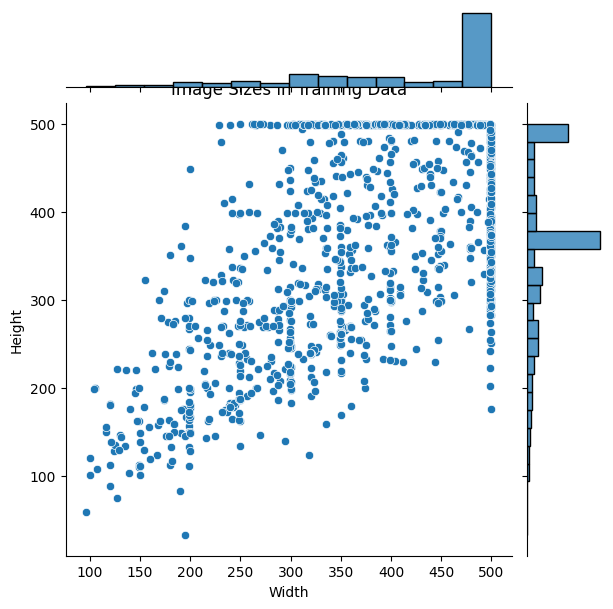

In [34]:
import numpy as np
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random


def get_image_sizes(data_dir):
    sizes = []
    for img_path in Path(data_dir).glob("*.jpg"):
        with Image.open(img_path) as img:
            sizes.append(img.size)  # (width, height)
    return sizes

# Path to the training data
train_path = Path().absolute() / "experiment_small_data/train"
image_sizes = get_image_sizes(train_path)

# Convert sizes to numpy array for plotting
sizes = np.array(image_sizes)



# Plotting image sizes
sns.jointplot(x=sizes[:, 0], y=sizes[:, 1], kind='scatter')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Sizes in Training Data')
plt.show()


Data augmentation is a technique used to artificially increase the size of a training dataset by creating modified versions of images in the dataset. This helps in improving the model's ability to generalize and avoid overfitting by introducing more variety in the training data. Choosing the right parameters for data augmentation depends on the nature of the images and the specific task. Common augmentations include rotations, shifts, flips, zooms, and changes in brightness. 

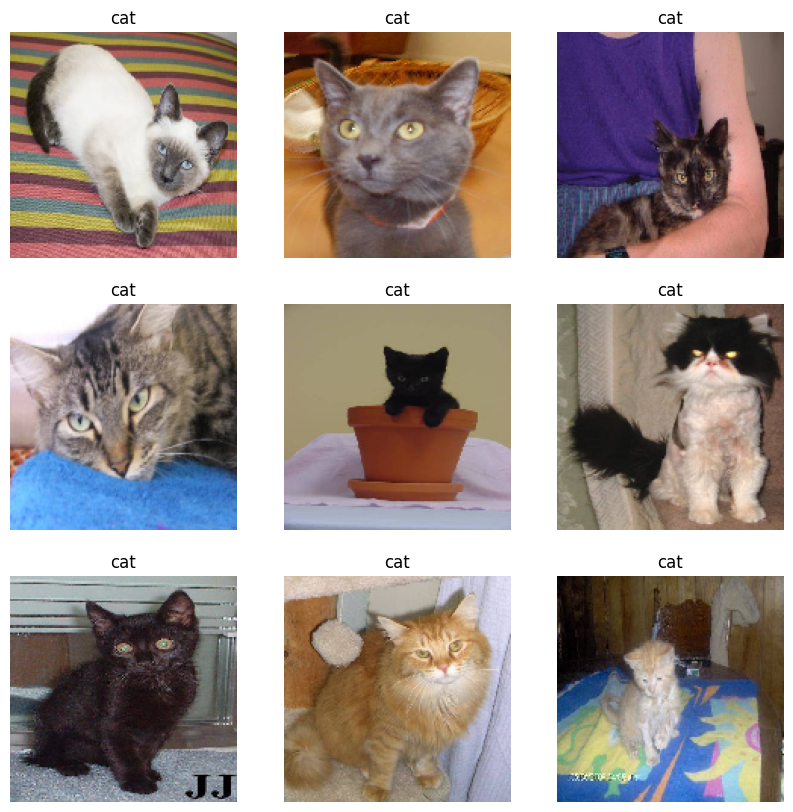

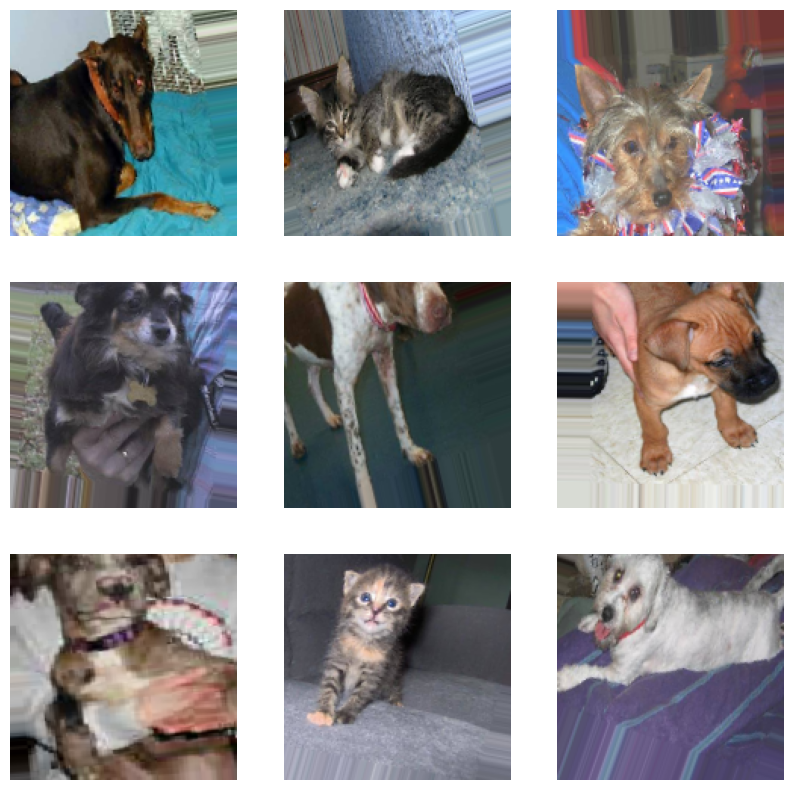

Epoch 1/5


c:\Users\Burai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.4920 - loss: 2.0316 - val_accuracy: 0.5000 - val_loss: 1.2486
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.5010 - loss: 1.0397 - val_accuracy: 0.5000 - val_loss: 0.7083
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.4864 - loss: 0.7006 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.5222 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.5032 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932


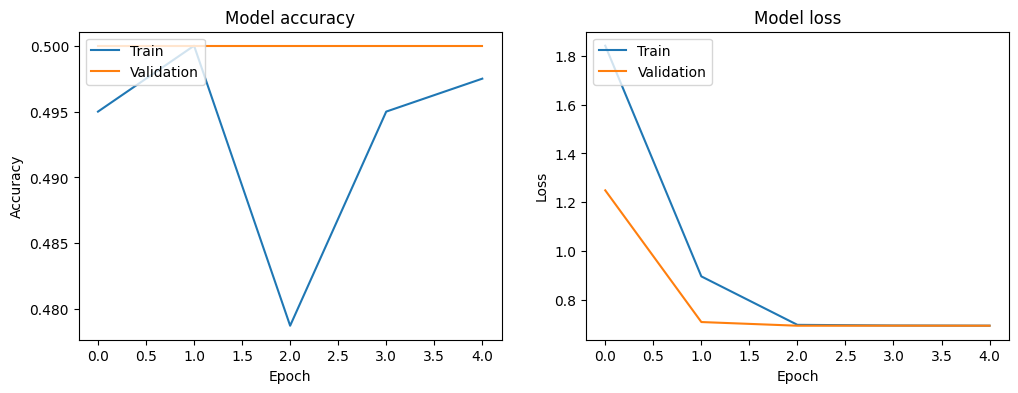

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8039 - loss: 0.6870
Test accuracy: 50.00%


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Define the paths
train_path = Path().absolute() / "experiment_small_data/train"
val_path = Path().absolute() / "experiment_small_data/val"
test_path = Path().absolute() / "experiment_small_data/test"

# Function to resize images
def resize_images(data_dir, target_size=(150, 150)):
    data = []
    labels = []
    for img_path in Path(data_dir).glob("*.jpg"):
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        data.append(img_array)
        if 'dog' in img_path.name:
            labels.append(1)
        elif 'cat' in img_path.name:
            labels.append(0)
    return np.array(data), np.array(labels)

# Resize images
train_images, train_labels = resize_images(train_path, target_size=(150, 150))
val_images, val_labels = resize_images(val_path, target_size=(150, 150))
test_images, test_labels = resize_images(test_path, target_size=(150, 150))

# Function to visualize images
def visualize_images(images, labels, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

# Visualize a few images
class_names = ["cat", "dog"]
visualize_images(train_images, train_labels, class_names)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen.fit(train_images)

# Visualize some augmented images
def visualize_augmented_images(datagen, images, num_images=9):
    plt.figure(figsize=(10, 10))
    for X_batch, _ in datagen.flow(images, np.zeros(len(images)), batch_size=num_images):
        for i in range(0, num_images):
            plt.subplot(3, 3, i + 1)
            plt.imshow(X_batch[i].astype("uint8"))
            plt.axis('off')
        break
    plt.show()

visualize_augmented_images(datagen, train_images)

# Define the CNN model with Sigmoid activation
def create_model(input_shape=(150, 150, 3), num_classes=2):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='sigmoid'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='sigmoid'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='sigmoid'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='sigmoid'),
        Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])
    return model

# Compile the model
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels), batch_size=32)

# Visualize and analyze loss and accuracy curves
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

# Plot the history of the trained model
plot_history(history)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

In [8]:
# Ensure test data is correctly loaded and preprocessed
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Check the distribution of labels
unique, counts = np.unique(test_labels, return_counts=True)
print(f"Test label distribution: {dict(zip(unique, counts))}")


# Check the range and mean of pixel values
print(f"Train images range: {train_images.min()} to {train_images.max()}")
print(f"Test images range: {test_images.min()} to {test_images.max()}")

# Re-evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy * 100:.2f}%')




Test images shape: (500, 150, 150, 3)
Test labels shape: (500,)
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8039 - loss: 0.6870
Test accuracy: 50.00%
Test label distribution: {0: 250, 1: 250}
Train images range: 0.0 to 255.0
Test images range: 0.0 to 255.0
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8039 - loss: 0.6870
Test loss: 0.6931986212730408
Test accuracy: 50.00%


## pick size to use

large size
- a lot of details
- risk for overfitting
- computationally costly


small size
- cheaper computation
- less details


something to onside
- don't go outside of the range of your distribution
- ex  (150, 150), (180, 200), (120, 120) utgångspunkt
- size by itself is a hyperparameter




